In [1]:
#from pydub import AudioSegment

import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile
#from pydub import AudioSegment


# files                                                                         
src1 = "string1.mp3"
dst1 = "string1.wav"
src2 = "string2.mp3"
dst2 = "string2.wav"
src3 = "string3.mp3"
dst3 = "string3.wav"

# add 0.15 ect
notes = {
        'E1': [329.63, 0.15],
        'B2': [246.94, 0.15],
        'G3': [196.00, 0.15],
        'D4': [146.83, 0.08],
        'A5': [110.00, 0.08],
        'E6': [82.41, 0.04]}

# convert wav to mp3                                                            
#sound = AudioSegment.from_mp3(src)
#sound.export(dst, format="wav")


def getFirstPic(half_yf, threshold):
    c=0
    ca_monte = False
    
    # Detecte les doubles pics, merge les pic si la distance entre 2 pic 
    # est inférieur a 20
    first_pic = 0
    second_pic = 0

    for i in range(len(half_yf)):
        # derivative
        d = half_yf[i+1] - half_yf[i]
        if (d>0):
            c+=1
            # on monte
            ca_monte = True
        else:
            if ca_monte == True:
                #on redescend
                ca_monte = False
                c=0
                if(half_yf[i]>threshold):
                    if (first_pic ==0):
                        first_pic = i
                    else:
                        second_pic = i
                        # Quand on a trouvé le second pic on peut sortir de 
                        # la boucle.
                        break
    
    if ((second_pic - first_pic)<20):
        return (first_pic + second_pic)/2        
                
    return(first_pic)


def getFondamental(data):
    # Select the first track 
    d = data.T[0] 
    
    # Calculate the fourier transform get the half of the lenght
    yf = fft(d)
    yf = abs(yf)
    half_yf = yf[:len(yf)//2]
    # Normalyze half_yf tu have a constant threshold
    maximum = np.amax(half_yf)
    half_yf = half_yf/maximum
    
    # change linespace start=0 stop fs/2
    xf = np.linspace(0.0, fs/2, len(data)//2)
     
    plt.plot(xf, half_yf)
    plt.grid() 
    plt.show()
    
    # select a threshold
    threshold = 0.2
    
    i = getFirstPic(half_yf, threshold)
        
    freq = ((fs/2)*(i+1))/len(half_yf)
    print(freq)
    return freq


def getNote(notes, freq, accuracy):
    """
    Find the right notes with accuracy
    """
    for key, value in notes.items():
        er = abs(value[0]-freq)
        # on est accordé juqu'a 5 cents
        if (er < (10 * value[1])):
            print("error in hertz = ", er)
            print("error in cent = ", er/value[1])
            return key

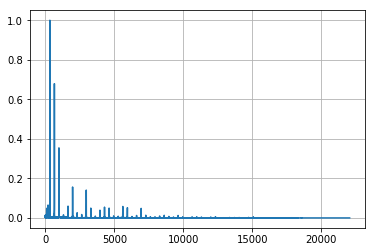

330.05202720905174
error in hertz =  0.4220272090517483
error in cent =  2.8135147270116554
E1


In [2]:
# load data from wave file
fs, data = wavfile.read(dst1)
freq = getFondamental(data)
note1 = getNote(notes, freq, 1)
print(note1)

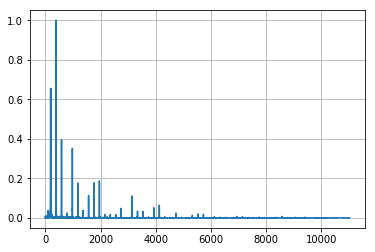

195.43874002863572
error in hertz =  0.5612599713642794
error in cent =  3.7417331424285294
G3


In [3]:
fs, data = wavfile.read(dst2)
freq = getFondamental(data)
note2 = getNote(notes, freq, 1)
print(note2)